In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('/content/drive/MyDrive/인공지능사관학교/빅데이터/별첨 1_DACON_신용카드 사용기록 EDA_최종/data_credit.csv')
df.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [4]:
df.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


In [5]:
df.info

<bound method DataFrame.info of          store_id        date      time  ... installments  days_of_week  holyday
0               0  2016-12-14  18:05:31  ...          NaN             2        0
1               0  2016-12-14  18:05:54  ...          NaN             2        0
2               0  2016-12-19  12:42:31  ...          NaN             0        0
3               0  2016-12-19  12:48:08  ...          NaN             0        0
4               0  2016-12-19  13:31:08  ...          NaN             0        0
...           ...         ...       ...  ...          ...           ...      ...
3362791      1799  2018-07-19  17:58:31  ...          NaN             3        0
3362792      1799  2018-07-19  18:54:34  ...          NaN             3        0
3362793      1799  2018-07-22  14:46:57  ...          NaN             6        0
3362794      1799  2018-07-25  18:09:13  ...          NaN             2        0
3362795      1799  2018-07-30  10:58:53  ...          NaN             0      

In [6]:
df.shape

(3362796, 8)

In [7]:
#결측치 채우기 
nas = df.isnull()
nas
print(nas.sum(axis = 0)) #열 별로 결측치 가 얼마 있는 지 확인 

'''
store_id             0 가게 아이디
date                 0 날짜 정보 
time                 0 시간 정보
card_id              0 카드 아이디 = 고객
amount               1 금액
installments    338825 환불 / 일시불 = Nan
days_of_week         1 요일별
holyday              1 휴일별 
'''

df = df.fillna(value = 1)  #결측치 데이터 를 전부 1로 채운다.
print(df)

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64
         store_id        date      time  ... installments  days_of_week  holyday
0               0  2016-12-14  18:05:31  ...          1.0             2        0
1               0  2016-12-14  18:05:54  ...          1.0             2        0
2               0  2016-12-19  12:42:31  ...          1.0             0        0
3               0  2016-12-19  12:48:08  ...          1.0             0        0
4               0  2016-12-19  13:31:08  ...          1.0             0        0
...           ...         ...       ...  ...          ...           ...      ...
3362791      1799  2018-07-19  17:58:31  ...          1.0             3        0
3362792      1799  2018-07-19  18:54:34  ...          1.0             3        0
3362793      1799  2018-07-22  14:46:57  ...          1.0         

In [8]:
#date 와 시간 을 월 정보와 시 정보만 가져오기 apply 사용 
df['date'] = df['date'].apply(lambda x:x[5:7])


In [9]:
df['time'] = df['time'].apply(lambda x:x[:2])

In [10]:
df['date']

0          12
1          12
2          12
3          12
4          12
           ..
3362791    07
3362792    07
3362793    07
3362794    07
3362795    07
Name: date, Length: 3362796, dtype: object

In [11]:
df['time']

0          18
1          18
2          12
3          12
4          13
           ..
3362791    17
3362792    18
3362793    14
3362794    18
3362795    10
Name: time, Length: 3362796, dtype: object

01    258378
02    250079
03    310753
04    318366
05    331971
06    332230
07    334019
08    237922
09    240458
10    244391
11    239853
12    264376
Name: date, dtype: int64


'\n3 4 \n5 6 \n7 -> max 여름 휴가 여름 바캉스? \n...\n11월에 최저\n'

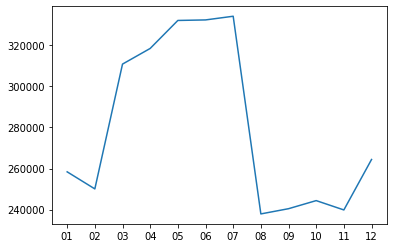

In [12]:
#date 월 별 신용카드 사용 수
df_date_count = df['date'].value_counts().sort_index()
print(df_date_count)
plt.plot(df_date_count)

'''
3 4 
5 6 
7 -> max 여름 휴가 여름 바캉스? 
...
11월에 최저
'''

00     70531
01     47969
02     31013
03     19649
04     11924
05     10094
06     14180
07     24169
08     44323
09     65588
10     81984
11    132848
12    353413
13    286206
14    205739
15    180008
16    179791
17    208018
18    275346
19    320627
20    298760
21    227403
22    162790
23    110423
Name: time, dtype: int64


'\n12 점심시간\n19 ~ 20 저녁시간 \n'

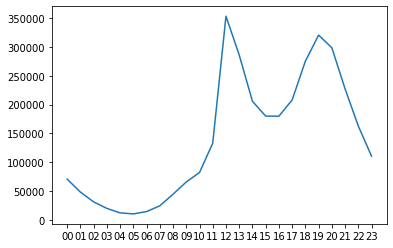

In [13]:
#time 시간대 별 신용카드 사용 수
df_time_count = df['time'].value_counts().sort_index()
print(df_time_count)
plt.plot(df_time_count)

'''
12 점심시간
19 ~ 20 저녁시간 
'''

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
657         1
632         1
727         1
201         1
991         1
Name: store_id, Length: 1775, dtype: int64


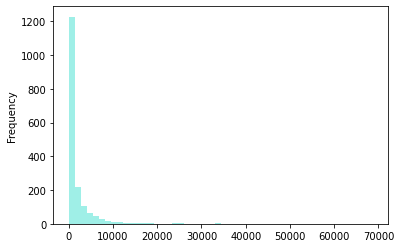

In [14]:
#가게 id 별 카드 사용 수 
df_store_count = df['store_id'].value_counts()

print(df_store_count)
df_store_count.plot.hist(bins=50,color="turquoise",alpha=0.5) #히스토그램에 올라갈 빈스수 알파  = 투명도 color = 막대 색깔
max_store =df_store_count.max()



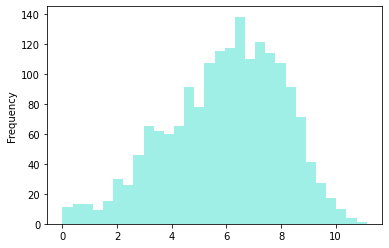

In [15]:
#가게 id 별 데이터를 log 수치로 바꿔서 표현하기 
df_store_log = np.log(df_store_count) #log 를 할떄는 수치 데이터 내가 id 별로 거래 횟수를 카운팅 했으니까 
df_store_log.plot.hist(bins=30,color="turquoise",alpha=0.5)

In [16]:
#가게 아이디 별 사용횟수 중에 가장 중앙에 있는 값 
np.median(df_store_count)

492.0

In [17]:
df[df.store_id == 0]

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,12,18,d297bba73f,5,1.0,2,0
1,0,12,18,d297bba73f,-5,1.0,2,0
2,0,12,12,0880849c05,144,1.0,0,0
3,0,12,12,8b4f9e0e95,66,1.0,0,0
4,0,12,13,7ad237eed0,24,1.0,0,0
...,...,...,...,...,...,...,...,...
68768,0,07,23,b07b89c873,74,1.0,1,0
68769,0,07,23,8d4822aa74,97,1.0,1,0
68770,0,07,23,f985e806d7,49,1.0,1,0
68771,0,07,23,2748138407,29,1.0,1,0


In [18]:
#print(df.store_id)
print(df.amount.argmax()) #가장 적은 금액을 한 인덱스
print(df.amount.argmin()) #가장 많은 금액을 한 인덱스 
print('----------------------------------------------')
storemax = df.amount.argmax()
storemin = df.amount.argmin()
print(df[df.store_id == 370]['amount'].sum()) #가장 큰 거래내역 가게 번호 의 매출 합
print('----------------------------------------------')
print(df[df.store_id == 370]['amount'].sum())

#for i in range(1562):
#print('store_id{}: ,{}'.format(i,df[df.store_id == i]['amount'].sum()))\

print(df.iloc[storemax])
print(df.iloc[storemin])
print('----------------------------------------------')

929470
929473
----------------------------------------------
1010371
----------------------------------------------
1010371
store_id               370
date                    01
time                    12
card_id         1c492f54f0
amount              250000
installments             3
days_of_week             0
holyday                  0
Name: 929470, dtype: object
store_id               370
date                    03
time                    19
card_id         1c492f54f0
amount             -250000
installments             3
days_of_week             0
holyday                  0
Name: 929473, dtype: object
----------------------------------------------


In [19]:
#가장 큰 거래 금액 명세서 의 가게번호 = 가장 작은 거래내역 명세서 가게 번호가 같다 
df[df.store_id ==370].head(3)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
929460,370,09,21,ff30f07073,1650,1.0,6,0
929461,370,10,17,3a595a5d17,4485,3.0,3,0
929462,370,11,00,4420052bfd,10000,12.0,1,0


In [20]:
#환불 비율 알아보기 amount 값이 - 이면 환불 이다 
(df[df.store_id ==370].amount <0).mean() 

0.3520408163265306

In [21]:
#370번 가게의 평균 거래 내역 절대값
amount = np.abs(df[df.store_id == 370].amount).mean()
print('{} 원'.format(int(np.round(amount,0)))) #평균 거래 내역 28190원 



28190 원


In [22]:
#card_id  = 1c492f54f0
df[df.card_id =='1c492f54f0']
#1월 12시에 산 제품을 3월 19시 날 환불



,store_id,date,time,card_id,amount,installments,days_of_week,holyday
929470,370,01,12,1c492f54f0,250000,3.0,0,0
929473,370,03,19,1c492f54f0,-250000,3.0,0,0


In [23]:
#카드 할부 보기 
df.installments.nunique()
#할부 방법이 17가지 있다.

17

In [24]:
freq3 = df.installments.value_counts()
freq3.sort_index()

1.0     3345936
2.0        3431
3.0       10686
4.0         209
5.0        1220
6.0         647
7.0          28
8.0          32
9.0          25
10.0        252
12.0        206
15.0          2
18.0         11
20.0          6
22.0          4
24.0         96
36.0          5
Name: installments, dtype: int64

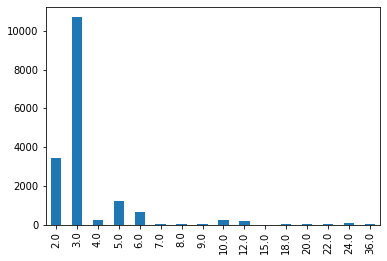

In [25]:
#installment != 1을 제외하고 시각화 
freq3b = df[df.installments!= 1].installments.value_counts()
freq3b = freq3b.sort_index()
freq3b.plot.bar()
plt.show()

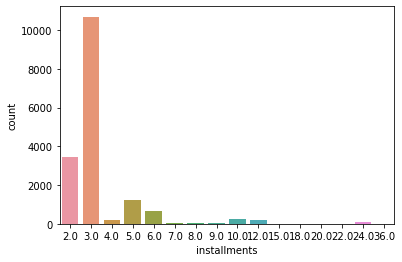

In [26]:
#seaborn 으로 사용한 시각화 
sns.countplot(data = df[df.installments != 1],x = 'installments')
plt.show()
#3개월 할부가 가장 많음 

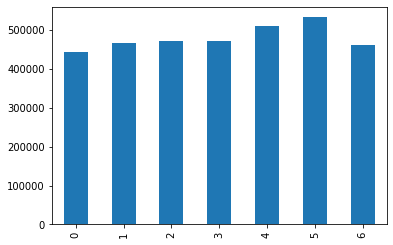

In [27]:
#요일별 거래내역 데이터 

freq4 = df.days_of_week.value_counts() #요일별 거래 횟수를 카운팅
freq4 = freq4.sort_index() #index 별로 정렬
freq4.plot.bar() #bar 데이터로 출력
plt.show()

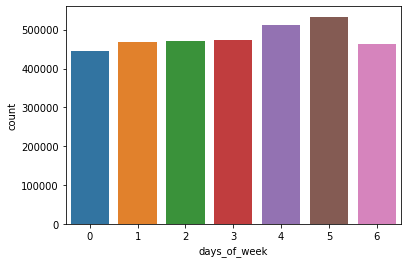

In [28]:
#seaborn 
sns.countplot(data = df , x = 'days_of_week') #seaborn countplot(data =df , x = 해당 columns 이름 )
plt.show()

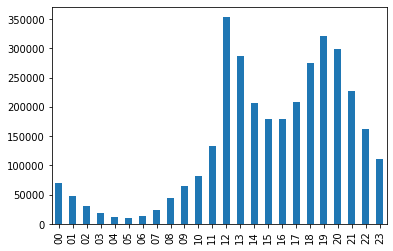

In [29]:
#시간대별 데이터 분석 
freq5 = df.time.value_counts()
freq5 = freq5.sort_index()
freq5.plot.bar()
plt.show()

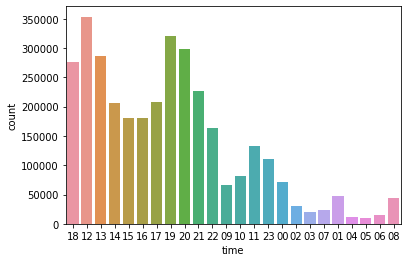

In [30]:
sns.countplot(data = df ,x = 'time')
plt.show()

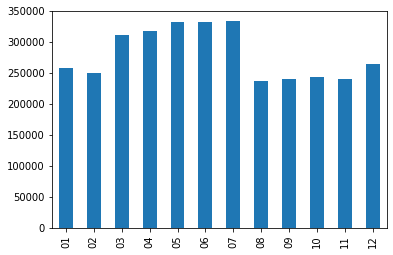

In [31]:
#달별 데이터 분석 
freq6 = df.date.value_counts()
freq6 = freq6.sort_index()
freq6.plot.bar()
plt.show()

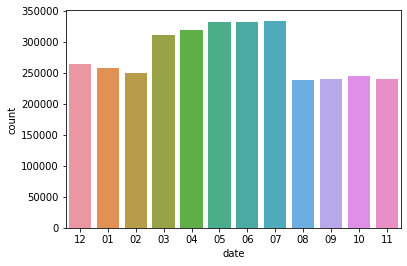

In [32]:
sns.countplot(data = df,x = 'date')
plt.show()

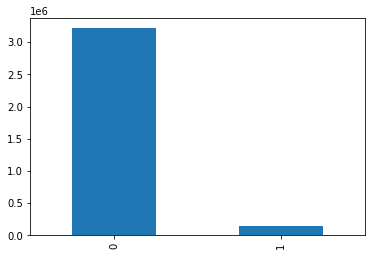

In [33]:
#holiday 데이터 만들기  1이면 공휴일 , 0이면 평일
freq7 = df.holyday.value_counts()
freq7 = freq7.sort_index()
freq7.plot.bar()
plt.show()

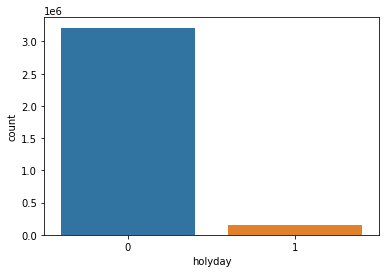

In [34]:
sns.countplot(data = df, x = 'holyday')
plt.show()

#### 4. 수치형 변수 1개 + 명목형 변수 1개를 조합한 탐색.

In [35]:
#store_id 별 결제 금액 top 10 
df.groupby("store_id").amount.mean().sort_values(ascending = False)[:10]
'''
df.groupby("column_name").amount.mean().sort_values(ascending = False) [:10]
ascending -> 오름차순 할지 내림 차순 할지 

'''

'\ndf.groupby("column_name").amount.mean().sort_values(ascending = False) [:10]\nascending -> 오름차순 할지 내림 차순 할지 \n\n'

In [36]:
#store_id 하위 탑 10 
df.groupby("store_id").amount.mean().sort_values(ascending = True)[:10]

store_id
866      0.000000
988      0.000000
350      0.000000
826      2.500000
703      5.000000
608      5.000000
1523    14.055306
845     16.635036
644     17.157303
923     18.539996
Name: amount, dtype: float64

In [37]:
#pivot table 로 분석 
pd.pivot_table(df,index = "store_id",values= "amount",aggfunc=np.mean).sort_values(by = "amount",ascending = False)[:10]

,amount
store_id,
1600,57750.000000
847,49000.000000
334,21334.745763
536,20417.083333
389,14642.857143
1273,11916.666667
320,10042.312500
279,9911.314286
44,9771.125000


In [38]:
#df[df.store_id == 988]

df[df.card_id == '8ff5c48b0d'][df.store_id == 988]
'''
같은 날짜에 작은금액 구매 환불 
큰 금액 구매 환불 

'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


'\n같은 날짜에 작은금액 구매 환불 \n큰 금액 구매 환불 \n\n'

In [39]:
df[df.store_id == 866]



,store_id,date,time,card_id,amount,installments,days_of_week,holyday
1730662,866,01,15,b3ce1fcc76,5,1.0,3,0
1730663,866,01,15,b3ce1fcc76,-5,1.0,3,0


In [68]:
df[df.store_id == 350]


,store_id,date,time,card_id,amount,installments,days_of_week,holyday
872102,350,07,10,79bafabefc,300,1.0,1,0
872103,350,07,10,79bafabefc,-300,1.0,1,0
872104,350,07,12,79bafabefc,300,1.0,1,0
872105,350,07,12,79bafabefc,-300,1.0,1,0


In [41]:
df[df.store_id == 847]

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
1712638,847,01,14,e5d233d934,43000,3.0,3,0
1712639,847,03,11,e5d233d934,55000,5.0,2,0


In [69]:
df[df.store_id == 334]


,store_id,date,time,card_id,amount,installments,days_of_week,holyday
839803,334,08,10,f8218bde68,20750,1.0,3,0
839804,334,09,10,9cb7ef43f2,16600,4.0,2,0
839805,334,09,09,f8218bde68,24500,1.0,0,0
839806,334,11,09,d91842810e,7500,3.0,3,0
839807,334,11,20,7dc711d0b3,3500,12.0,0,0
839808,334,12,15,774e7f4126,11500,5.0,1,0
839809,334,12,10,2230c72055,3250,12.0,3,0
839810,334,12,13,f8218bde68,17500,1.0,0,0
839811,334,01,09,f8218bde68,25000,1.0,2,0
839812,334,02,15,a5a894cfa6,27000,6.0,1,0


In [43]:
#card_id 별 금액 랭킹 평균 금액

df.groupby("card_id").amount.mean().sort_values(ascending = False)[:10]

card_id
fae5d55226    101190.000000
7fbba44248     73388.000000
e5d233d934     49000.000000
704b7f81dc     45570.000000
f408c22f2a     45000.000000
de78de56a0     41130.769231
0aba1043b4     38500.000000
75e5119315     36313.000000
784f7b2053     34830.000000
409ed21309     31336.000000
Name: amount, dtype: float64

In [44]:
df[df.card_id == 'fae5d55226']
'''
한번 썻는데 평균 금액
'''

'\n한번 썻는데 평균 금액\n'

In [45]:
#card_id 별 총 금액 랭킹 탑 10 
df.groupby("card_id").amount.sum().sort_values(ascending = False)[:10]

card_id
f8218bde68    761667
4a26873e51    562793
d8b799ac0c    551625
de78de56a0    534700
2796a2b778    375918
a5a894cfa6    344577
3a9deab63f    333884
46a88eb161    283820
10a5c30cda    241858
48e87aab97    235428
Name: amount, dtype: int64

In [46]:
df[df.card_id == 'f8218bde68']
'''
거래가 많음 
'''

'\n거래가 많음 \n'

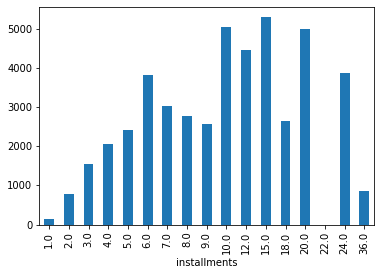

In [47]:
ser = df.groupby('installments').amount.mean()
ser.plot.bar()
plt.show()

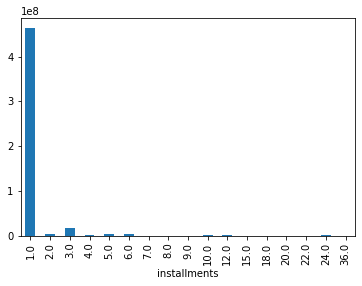

In [48]:
ser1 = df.groupby('installments').amount.sum()
ser1.plot.bar()
plt.show() #1개월이 앞도적으로 많음 

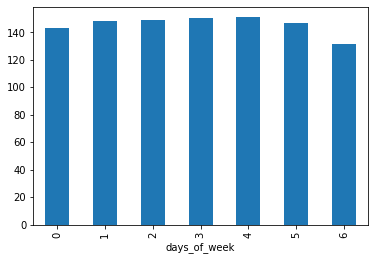

In [49]:
#요일별 결제 금액 
ser = df.groupby('days_of_week').amount.mean()
ser.plot.bar()
plt.show()

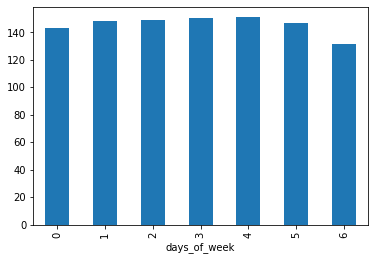

In [50]:
#요일별 total 
ser = df.groupby('days_of_week').amount.mean()
ser.plot.bar()
plt.show()

holyday
0    146.476094
1    134.881488
Name: amount, dtype: float64


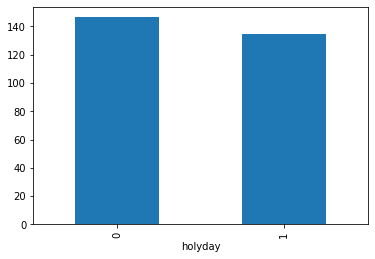

In [51]:
#휴일별 평균 
ser = df.groupby('holyday').amount.mean()
print(ser)
ser.plot.bar()
plt.show()

holyday
0    470742088
1     20099365
Name: amount, dtype: int64


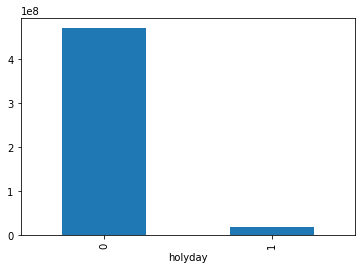

In [52]:
ser = df.groupby('holyday').amount.sum()
print(ser)
ser.plot.bar()
plt.show()

date
01    153.919320
02    154.162361
03    148.088942
04    143.832564
05    141.893888
06    137.640728
07    138.714705
08    141.134347
09    143.590390
10    142.385616
11    147.652137
12    163.492374
Name: amount, dtype: float64


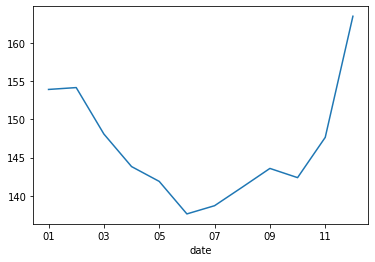

In [53]:
#월별 
ser = df.groupby('date').amount.mean()
print(ser)
ser.plot()
plt.show()

date
01    39769366
02    38552769
03    46019083
04    45791398
05    47104656
06    45728379
07    46333347
08    33578966
09    34527458
10    34797763
11    35414808
12    43223460
Name: amount, dtype: int64


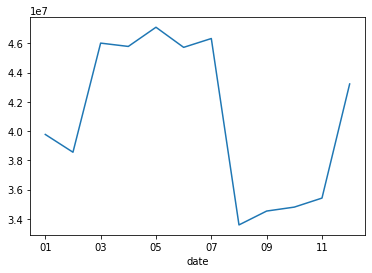

In [54]:
ser = df.groupby('date').amount.sum()
print(ser)
ser.plot()
plt.show()

time
00    199.508684
01    208.943839
02    209.039306
03    194.597282
04    167.662026
05    137.256984
06    133.879478
07    108.456287
08     92.711504
09    116.662682
10    141.981570
11    136.308751
12    117.167170
13    122.870995
14    137.758860
15    145.151727
16    146.352654
17    137.238874
18    134.136904
19    145.681287
20    172.008559
21    171.303250
22    166.316137
23    181.644920
Name: amount, dtype: float64


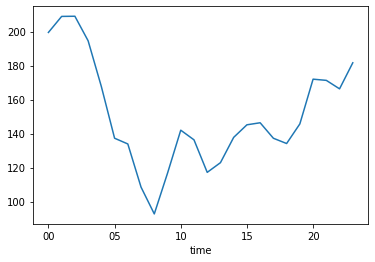

In [55]:
#시간대별
ser = df.groupby('time').amount.mean()
print(ser)
ser.plot()
plt.show()

time
00    14071547
01    10022827
02     6482936
03     3823642
04     1999202
05     1385472
06     1898411
07     2621280
08     4109252
09     7651672
10    11640217
11    18108345
12    41408401
13    35166416
14    28342370
15    26128472
16    26312890
17    28548156
18    36934060
19    46709354
20    51389277
21    38954873
22    27074604
23    20057777
Name: amount, dtype: int64


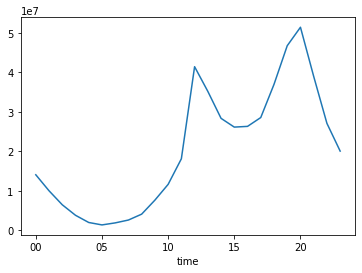

In [56]:
#시간대별
ser = df.groupby('time').amount.sum()
print(ser)
ser.plot()
plt.show()

#### 3개의 columns  명목형 2개 수치형 1개 

In [57]:
#평균 
df2 = pd.pivot_table(df,index = 'time',columns = 'date',values = 'amount',aggfunc = np.mean)
df2
df2.max(axis = 1) #시간 대별 최대값 
df2.max(axis = 0)

df2.min(axis = 1)
df2.min(axis = 0)

date
01    100.615124
02    103.014437
03     97.210364
04     95.850035
05     91.792767
06     90.918989
07     90.082272
08     95.663186
09     86.231652
10     71.078295
11     87.384941
12    103.214286
dtype: float64

In [58]:
df2 = pd.pivot_table(df,index = 'time',columns = 'date',values = 'amount',aggfunc = np.sum)
df2.max(axis = 1) #시간 대별 최대값 
df2.max(axis = 0)

df2.min(axis = 1)
df2.min(axis = 0)

date
01     89097
02     95366
03    129831
04    182882
05    193182
06    131226
07    135947
08     84378
09     84185
10     91831
11     78191
12     89356
dtype: int64

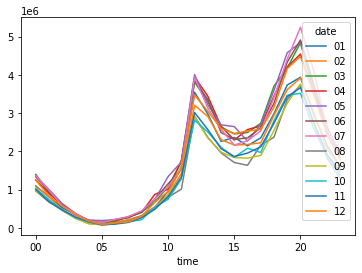

In [59]:
df2.plot()
plt.show()

In [60]:
# 평균.
df3 = pd.pivot_table(df, index="time", columns="days_of_week", values = "amount", aggfunc=np.mean)
df3

days_of_week,0,1,2,3,4,5,6
time,,,,,,,
00,150.060593,210.702354,225.979060,218.082542,220.911446,204.941779,167.799726
01,160.053734,226.175656,230.291652,240.749276,235.291956,210.671887,174.275797
02,160.798972,226.434214,216.027990,229.174302,230.299285,218.076097,185.958962
03,147.924168,200.281961,191.243737,211.309099,201.385243,217.112101,180.853155
04,144.015911,145.820781,158.366228,181.166776,149.240231,197.756470,172.184450
05,111.075286,115.055513,163.391304,161.128434,131.996865,134.062675,140.603352
06,126.596873,138.998100,149.386858,128.681089,135.977051,134.712044,120.143016
07,105.695235,105.687785,105.210957,105.913630,111.058717,116.758580,109.554483
08,93.973933,89.017517,86.897597,84.536918,89.162315,108.521523,105.589273


In [61]:
# 평균.
df3 = pd.pivot_table(df, index="time", columns="days_of_week", values = "amount", aggfunc=np.sum)
df3

days_of_week,0,1,2,3,4,5,6
time,,,,,,,
00,1082237,1781067,1985678,1997418,2020677,3002602,2201868
01,756574,1257989,1307596,1412476,1421634,2111775,1754783
02,500728,796822,764091,845424,901852,1441483,1232536
03,302357,457444,450379,496999,493998,877350,745115
04,181028,209107,216645,277004,232964,466112,416342
05,135734,151298,221722,217040,168428,239570,251680
06,226735,292591,302359,264697,278481,317651,215897
07,352705,393687,386019,392410,429353,394644,272462
08,587619,635229,607588,589645,645446,612604,431121


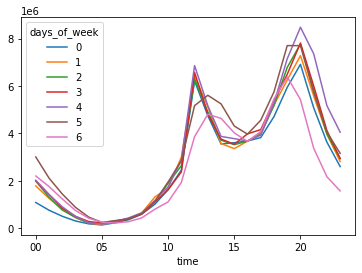

In [62]:
# 시각화.
df3.plot()
plt.show()

##6 등급화 

In [63]:
ser = df.groupby("store_id").amount.sum()
ser2 = pd.qcut(ser,3,labels = ['Low','Medium','High'])
combo = pd.DataFrame({"Store ID":ser.index,"Amount":ser.values,"Category":ser2.values})
combo.head(10)

,Store ID,Amount,Category
0,0,5234611,High
1,1,147950,Medium
2,2,1615060,High
3,3,62781,Medium
4,4,270312,High
5,5,184437,Medium
6,6,1389983,High
7,7,109510,Medium
8,8,515535,High
9,9,19760,Low


In [64]:
# 등급별 평균.
combo.groupby("Category")["Amount"].mean()

Category
Low        23272.582770
Medium    125787.788494
High      680276.184122
Name: Amount, dtype: float64

In [65]:
# card_id별 total 결제 금액에 의한 3 등급 분류. HINT: pd.qcut() 사용.
ser = df.groupby("card_id").amount.sum()
ser2 = pd.qcut(ser,3,labels=['Low', 'Medium', 'High'])                      # qcut() 함수 사용!
combo = pd.DataFrame({"Card ID":ser.index, "Amount":ser.values, "Category":ser2.values})
combo.head(10)

,Card ID,Amount,Category
0,000009e765,10,Low
1,00000f9eaa,331,Medium
2,0000134335,90,Low
3,000024f480,80,Low
4,000036a26b,720,High
5,00003c84e3,255,Medium
6,00003cb9a7,85,Low
7,000043b1cb,1186,High
8,000055e420,187,Medium
9,00008a3f32,335,Medium


In [66]:
# 등급별 평균.
combo.groupby("Category")["Amount"].mean()

Category
Low         63.729680
Medium     219.315716
High      1318.055873
Name: Amount, dtype: float64